# Data Analysis

---

By Stable Space

---
# Objective
- Univariate Analysis
- Outlier Handling/ Missing Value Handling
- Bivariate Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/indian-kids-screentime-2025/Indian_Kids_Screen_Time.csv


Dataset Loading

In [2]:
df = pd.read_csv("/kaggle/input/indian-kids-screentime-2025/Indian_Kids_Screen_Time.csv")

Printing First Five Rows of the Dataset

In [3]:
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


Shape (rows x columns) of the Dataset

In [4]:
df.shape

(9712, 8)

General Info About the Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


Checking for NULL/NaN Values

In [6]:
df.isnull().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

---

Only `Health_Impacts` Column has `NaN` values with a count of 3218.

---

# Univariate Analysis
Analyzing one column (variable) at a time to find its:
- Central tendency
- Spread of Data
- Shape of Distribution
- Visual Representation


We will create different functions for this purpose
- summarize_dataset will be for `Central tendency` and `Spread of Data`
- `hist_plot` and `bar_plot` will be for `Shape of Distribution` and `Visual Representation`

The following function is `summarize_column` and it has the following properties:
- It takes `df` and `col` as inputs, and
- Analyze the data on the basis of following properties:
  - value_counts()
  - Percentage distribution
  - .describe()
  - Range calculation
  - Mode and Median
  - Variance, Skewness, Kurtosis
  - IQR
  - SEM (Standard Error of the Mean)



In [7]:
def summarize_column(df, col):
    print(f"\n{'-'*10} Summary of '{col}' {'-'*10}")
    
    series = df[col]
    
    # Frequency Counts
    print(f"\n{'-'*10} Unique {col} Values and Their Count {'-'*10}")
    value_counts = series.value_counts()
    print(value_counts.reset_index(name="Count").rename(columns={"index": col}))

    # Percentage Distribution
    print(f"\n{'-'*10} Percentage Distribution of {col} {'-'*10}")
    value_percentages = series.value_counts(normalize=True) * 100
    print(value_percentages.reset_index(name="Percentage (%)").rename(columns={"index": col}))

    # Statistical Summary
    print(f"\n{'-'*10} Statistical Properties of {col} {'-'*10}")
    stat_prop = series.describe()
    print(stat_prop)

    # Range
    val_range = stat_prop['max'] - stat_prop['min']
    print(f"\n{'-'*10} Range (max - min) of {col} {'-'*10}")
    print(f"{stat_prop['max']} - {stat_prop['min']} = {round(val_range, 2)}")

    # Mode and Median
    mode_val = series.mode()[0] if not series.mode().empty else "No mode"
    median_val = series.median()
    print(f"\n{'-'*10} Mode and Median of {col} {'-'*10}")
    print(f"Mode = {mode_val}, Median = {median_val}")

    # Variance, Skewness, Kurtosis, IQR, SEM
    variance = series.var()
    skewness = series.skew()
    kurtosis = series.kurt()
    iqr = series.quantile(0.75) - series.quantile(0.25)
    sem = series.sem()

    print(f"\n{'-'*10} Additional Statistical Properties of {col} {'-'*10}")
    print(f"Variance = {variance:.2f}")
    print(f"Skewness = {skewness:.2f}")
    print(f"Kurtosis = {kurtosis:.2f}")
    print(f"IQR (Q3 - Q1) = {iqr:.2f}")
    print(f"SEM (Standard Error of Mean) = {sem:.4f}")

    # TEXTUAL INTERPRETATION
    print(f"\n{'-'*10} Textual Interpretation of '{col}' {'-'*10}")

    mean_val = stat_prop['mean']
    std_val = stat_prop['std']

    interpretation = []

    # Spread analysis
    if std_val < 2:
        interpretation.append("The values are closely packed around the mean, showing low variability.")
    elif std_val < 5:
        interpretation.append("The values show moderate spread around the mean.")
    else:
        interpretation.append("The values are widely spread from the mean, indicating high variability.")

    # Symmetry
    if abs(skewness) < 0.5:
        interpretation.append("The distribution appears symmetric.")
    elif skewness > 0.5:
        interpretation.append("The distribution is positively skewed (tail on the right).")
    else:
        interpretation.append("The distribution is negatively skewed (tail on the left).")

    # Kurtosis
    if abs(kurtosis) < 1:
        interpretation.append("The distribution has normal (mesokurtic) tails.")
    elif kurtosis > 1:
        interpretation.append("The distribution is leptokurtic (peaked with heavy tails).")
    else:
        interpretation.append("The distribution is platykurtic (flat with light tails).")

    # Mode-Median-Mean relationship
    if abs(mean_val - median_val) < 1 and abs(mean_val - mode_val) < 1:
        interpretation.append("Mean, median, and mode are nearly equal")
    else:
        interpretation.append("There’s a noticeable difference between mean, median, and mode.")

    for sentence in interpretation:
        print(f"- {sentence}")


The following function is for the bar plot which is plotted for the column with discrete values

In [8]:
def bar_plot(df, col):
    series = df[col]
    value_counts = series.value_counts()
    plt.figure(figsize = (8,6), dpi = 100, edgecolor = "black",facecolor = "white")
    plt.bar(
        value_counts.index,
        value_counts.values,
        color = "orange",
        width = 0.4,
        linewidth = 1,
        edgecolor = "black",
        align = "center"
    )
    plt.title(f"Bar plot of {col}", fontsize = 20, fontweight = "bold",color = "black", loc = "center")
    plt.xlabel(f"{col}", fontsize = 16, fontweight = "bold",color = "black")
    plt.ylabel("Count", fontsize = 16, fontweight = "bold", color = "black")
    plt.xticks(rotation = 90, fontsize = 14)
    plt.yticks(rotation = 0, fontsize = 14)
    plt.tight_layout()
    plt.show()

The following function is for the histogram plot which is plotted for the column with continuous values.

In [9]:
def hist_plot(df, col):
    plt.figure(figsize = (8, 6), dpi = 100, edgecolor = "black", facecolor = "white")
    plt.hist(
        df[col],
        bins = 10,
        color = "orange",
        align = "mid",
    )
    plt.title(f"Histogram of {col}", fontsize = 20, fontweight = "bold", color = "black", loc = "center")
    plt.xlabel(f"{col}", fontsize = 16, fontweight = "bold",color = "black")
    plt.ylabel("Count", fontsize = 16, fontweight = "bold", color = "black")
    plt.xticks(rotation = 0, fontsize = 14)
    plt.yticks(rotation = 0, fontsize = 14)
    plt.tight_layout()
    plt.show()

### Column: Age


---------- Summary of 'Age' ----------

---------- Unique Age Values and Their Count ----------
    Age  Count
0    17    919
1     8    912
2    13    910
3    14    896
4     9    885
5    10    877
6    16    876
7    12    867
8    11    866
9    15    864
10   18    840

---------- Percentage Distribution of Age ----------
    Age  Percentage (%)
0    17        9.462521
1     8        9.390445
2    13        9.369852
3    14        9.225700
4     9        9.112438
5    10        9.030066
6    16        9.019769
7    12        8.927100
8    11        8.916804
9    15        8.896211
10   18        8.649094

---------- Statistical Properties of Age ----------
count    9712.000000
mean       12.979201
std         3.162437
min         8.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        18.000000
Name: Age, dtype: float64

---------- Range (max - min) of Age ----------
18.0 - 8.0 = 10.0

---------- Mode and Median of Age ----------
Mode = 17, Median = 13

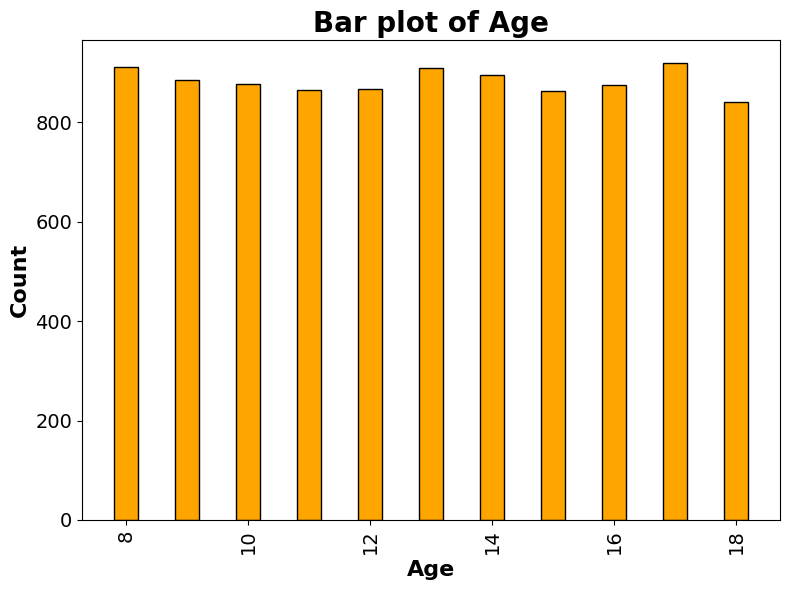

In [10]:
# Since the max and min value of the age column is 18 ans 8, so there is no need of the age column be to int64, so convert it into int8
df["Age"] = df["Age"].astype("int8")

summarize_column(df, "Age")

print("\n")

bar_plot(df, "Age")

### Column: Gender

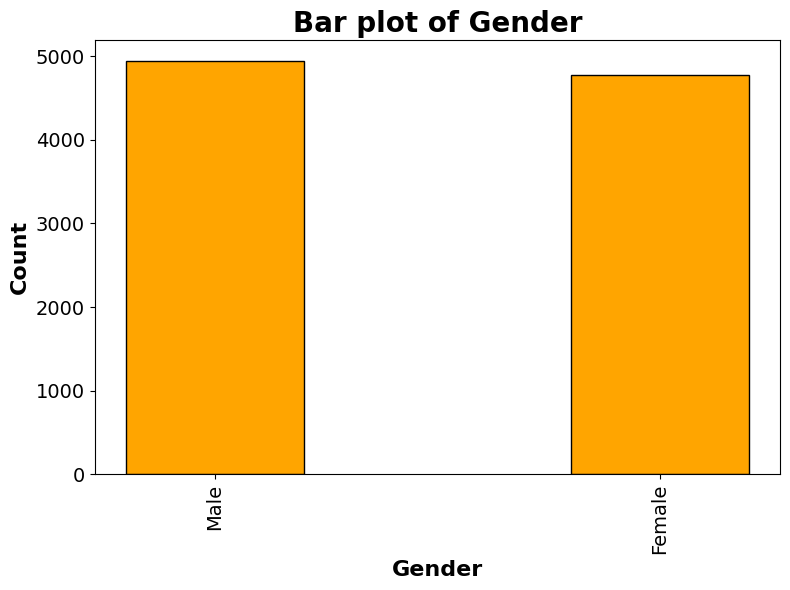

In [11]:
# Since gender is of string type data, so no summarize_column for it.

bar_plot(df,"Gender")

### Column: Avg_Daily_Screen_Time_hr


---------- Summary of 'Avg_Daily_Screen_Time_hr' ----------

---------- Unique Avg_Daily_Screen_Time_hr Values and Their Count ----------
     Avg_Daily_Screen_Time_hr  Count
0                        0.00    226
1                        4.93     41
2                        4.03     39
3                        4.96     39
4                        4.32     39
..                        ...    ...
894                      9.68      1
895                      8.22      1
896                      8.06      1
897                     10.07      1
898                      7.47      1

[899 rows x 2 columns]

---------- Percentage Distribution of Avg_Daily_Screen_Time_hr ----------
     Avg_Daily_Screen_Time_hr  Percentage (%)
0                        0.00        2.327018
1                        4.93        0.422158
2                        4.03        0.401565
3                        4.96        0.401565
4                        4.32        0.401565
..                        ...             

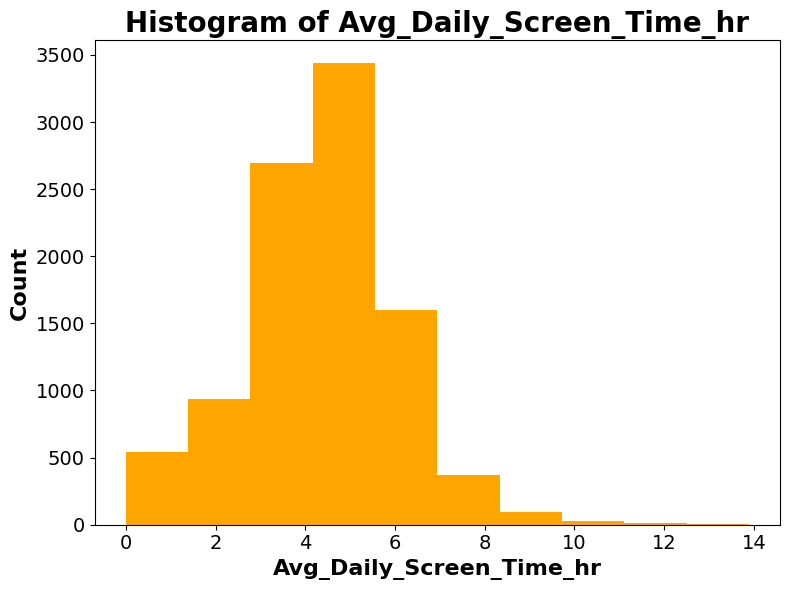

In [12]:
summarize_column(df, "Avg_Daily_Screen_Time_hr")

print("\n")

hist_plot(df, "Avg_Daily_Screen_Time_hr")

### Column: Primary_Device

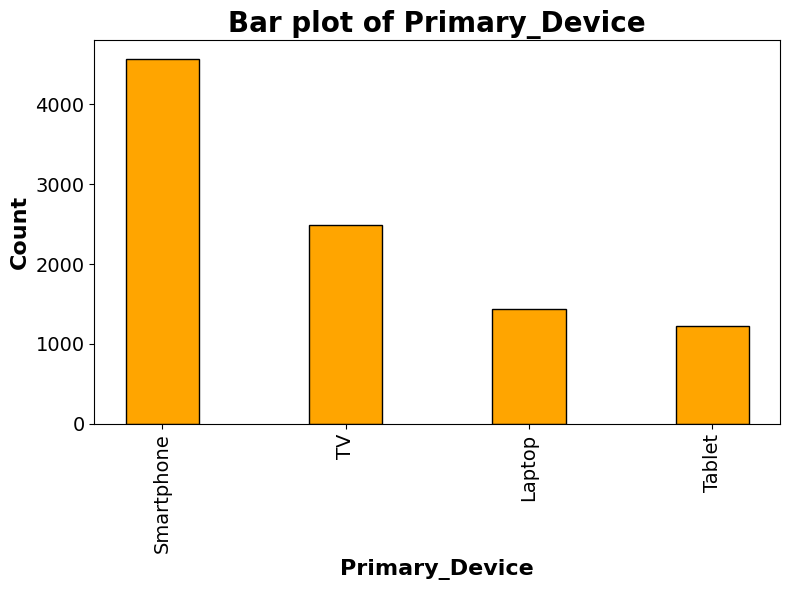

In [13]:
# Since Primary_Device is of string type data, so no summarize_column for it.

bar_plot(df,"Primary_Device")

### Column: Exceeded_Recommended_Limit

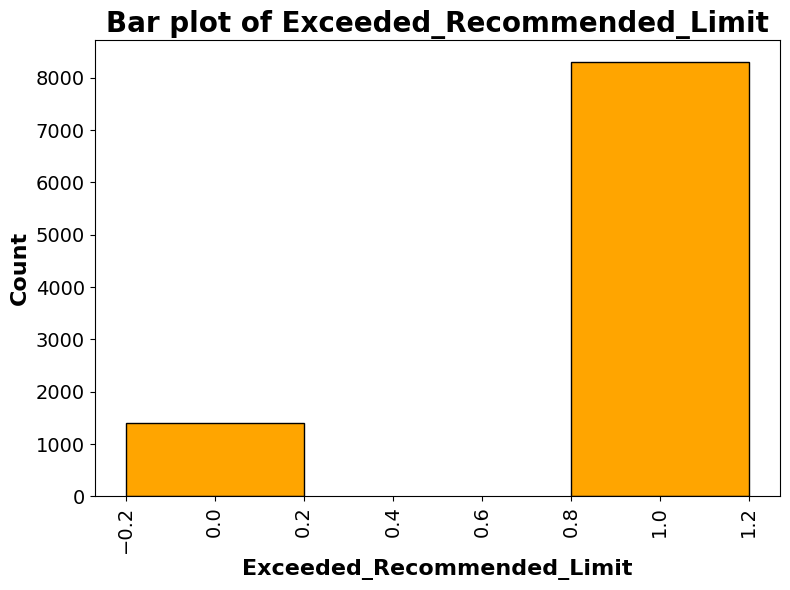

In [14]:
# Since Exceeded_Recommended_Limit is of string type data, so no summarize_column for it.

bar_plot(df, "Exceeded_Recommended_Limit")

### Column: Educational_to_Recreational_Ratio


---------- Summary of 'Educational_to_Recreational_Ratio' ----------

---------- Unique Educational_to_Recreational_Ratio Values and Their Count ----------
    Educational_to_Recreational_Ratio  Count
0                                0.45    519
1                                0.41    493
2                                0.47    490
3                                0.46    489
4                                0.44    485
5                                0.43    465
6                                0.49    465
7                                0.42    459
8                                0.40    434
9                                0.48    427
10                               0.37    391
11                               0.36    383
12                               0.39    372
13                               0.31    347
14                               0.32    346
15                               0.38    344
16                               0.35    342
17                               

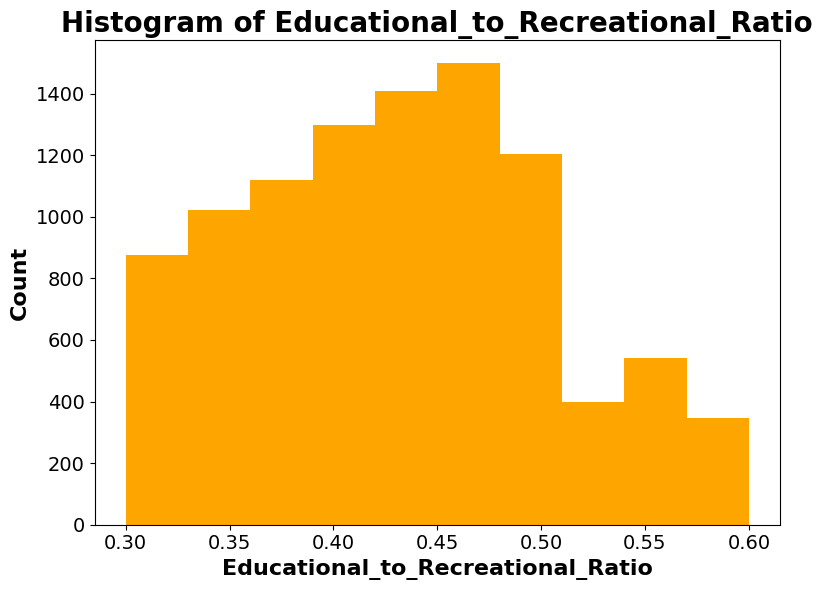

In [15]:
summarize_column(df, "Educational_to_Recreational_Ratio")

print("\n")

hist_plot(df, "Educational_to_Recreational_Ratio")

### Column: Health_Impacts

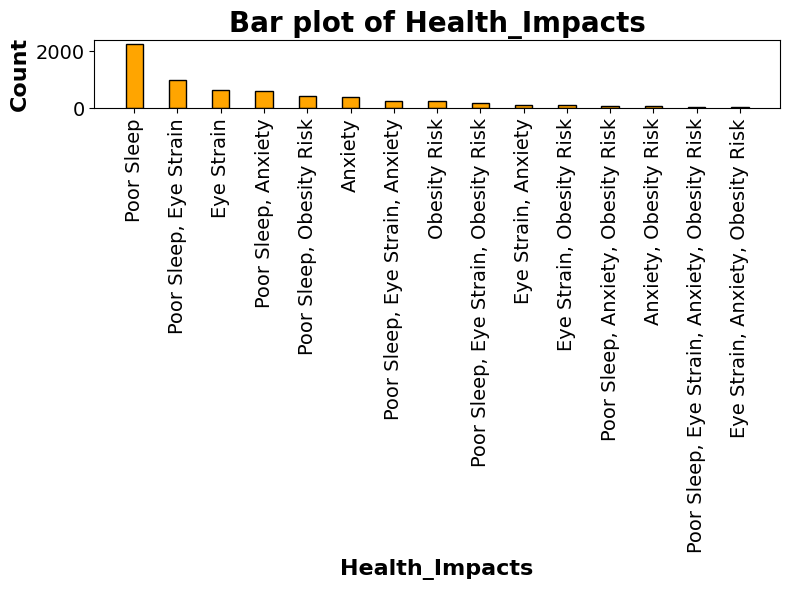

In [16]:
# Since Health_Impacts is of string type data, so no summarize_column for it.


bar_plot(df, "Health_Impacts")

### Column: Urban_or_Rural

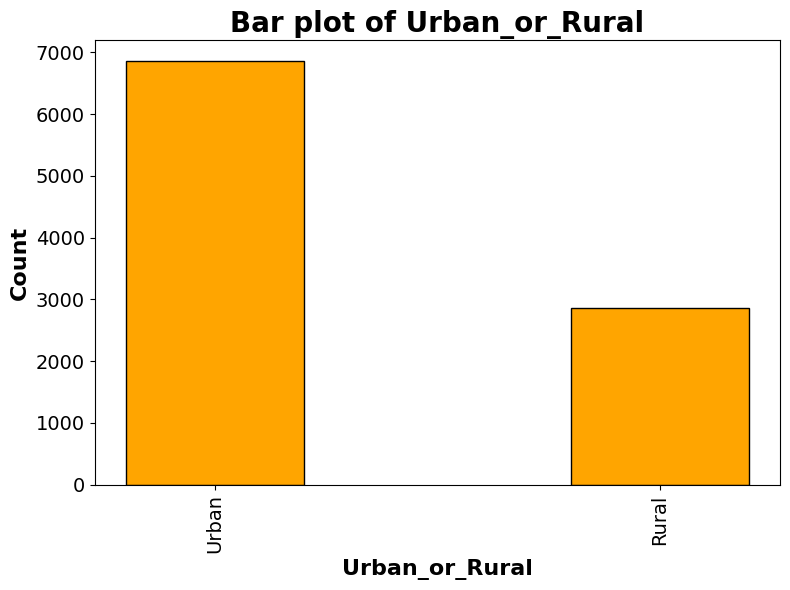

In [17]:
# Since Urban_or_Rural is of string type data, so no summarize_column for it.


bar_plot(df, "Urban_or_Rural")

# Outlier Handling
Only the following columns are of numeric type:
- Age
- Avg_Daily_Screen_Time_hr
- Educational_to_Recreational_Ratio

We will use IQR (Inter Quartile Range) to  detect outliers and median to fill them.

In [18]:
def I_Q_R(df, col):
    series = df[col]
    
    Q1 = np.percentile(series, 25)
    Q3 = np.percentile(series, 75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    
    outliers_values = df.loc[outliers, col]
    print("-"*10,"Outliers","-"*10)
    print(outliers_values)
    
    median = df[col].median()
    df.loc[outliers,col] = median

### Column: Age

In [19]:
I_Q_R(df, "Age")

---------- Outliers ----------
Series([], Name: Age, dtype: int8)


### Column: Educational_to_Recreational_Ratio

In [20]:
I_Q_R(df, "Educational_to_Recreational_Ratio")

---------- Outliers ----------
Series([], Name: Educational_to_Recreational_Ratio, dtype: float64)


### Column: Avg_Daily_Screen_Time_hr           

In [21]:
I_Q_R(df, "Avg_Daily_Screen_Time_hr")

---------- Outliers ----------
19       0.00
28       0.31
36      11.68
46       0.00
58       0.00
        ...  
9630     9.70
9633     0.00
9641     0.00
9659     0.00
9660     0.00
Name: Avg_Daily_Screen_Time_hr, Length: 448, dtype: float64


# NaN values Handling
Only `Health_Impacts` Column has NaN values

In [22]:
df["Health_Impacts"] = df["Health_Impacts"].fillna(df["Health_Impacts"].mode()[0])

In [23]:
df.isnull().sum()

Age                                  0
Gender                               0
Avg_Daily_Screen_Time_hr             0
Primary_Device                       0
Exceeded_Recommended_Limit           0
Educational_to_Recreational_Ratio    0
Health_Impacts                       0
Urban_or_Rural                       0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int8   
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     9712 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int8(1), object(4)
memory usage: 474.3+ KB


---
Memory Size has been reduced from 540.7+ KB to 474.3+ KB

---

# Bivariate Analysis
Bivariate analysis is a statistical method that examines the relationship between two variables. The goal is to determine whether and how the variables are related—whether changes in one variable are associated with changes in the other.

Bivariate Analysis will be performed in between:
- Age & Gender
- Age & Avg_Daily_Screen_Time_hr
- Gender & Avg_Daily_Screen_Time_hr
- Gender & Educational_to_Recreational_Ratio
- Gender & Urban_or_Rural
- Gender & Primary_Device
- Age & Primary_Device

### Columns: Age & Gender

In [27]:
mean_age_per_gender = df.groupby("Gender")["Age"].mean()

print(mean_age_per_gender.reset_index(name = "Mean age"))

   Gender   Mean age
0  Female  12.972956
1    Male  12.985229


### Columns: Age & Avg_Daily_Screen_Time_hr

In [31]:
mean_screenTime_per_Age = df.groupby("Age")["Avg_Daily_Screen_Time_hr"].mean()

print(mean_screenTime_per_Age.reset_index(name = "mean screen time"))

    Age  mean screen time
0     8          4.212325
1     9          4.171559
2    10          4.182714
3    11          4.492517
4    12          4.559100
5    13          4.500967
6    14          4.505647
7    15          4.446678
8    16          4.546952
9    17          4.564788
10   18          4.503976


### Columns: Gender & Avg_Daily_Screen_Time_hr

In [32]:
mean_screenTime_per_gender = df.groupby("Gender")["Avg_Daily_Screen_Time_hr"].mean()

print(mean_screenTime_per_gender.reset_index(name = "mean screen time"))

   Gender  mean screen time
0  Female          4.408878
1    Male          4.441724


### Columns: Gender & Educational_to_Recreational_Ratio

In [34]:
mean_ratio_per_gender = df.groupby("Gender")["Educational_to_Recreational_Ratio"].mean()

print(mean_ratio_per_gender.reset_index(name = "mean ratio"))

   Gender  mean ratio
0  Female    0.426694
1    Male    0.427740


### Columns: Gender & Urban_or_Rural

In [35]:
valueCountOf_location_per_gender = df.groupby("Gender")["Urban_or_Rural"].value_counts()

print(valueCountOf_location_per_gender.reset_index(name = "Count of Urban/Rural"))

   Gender Urban_or_Rural  Count of Urban/Rural
0  Female          Urban                  3360
1  Female          Rural                  1410
2    Male          Urban                  3491
3    Male          Rural                  1451


### Columns: Gender & Primary_Device

In [38]:
valueCountOf_device_per_gender = df.groupby("Gender")["Primary_Device"].value_counts()

print(valueCountOf_device_per_gender.reset_index(name = "count of device"))

   Gender Primary_Device  count of device
0  Female     Smartphone             2221
1  Female             TV             1218
2  Female         Laptop              741
3  Female         Tablet              590
4    Male     Smartphone             2347
5    Male             TV             1269
6    Male         Laptop              692
7    Male         Tablet              634


### Columns: Age & Primary_Device

In [39]:
valueCountOf_device_per_Age = df.groupby("Age")["Primary_Device"].value_counts()

print(valueCountOf_device_per_Age.reset_index(name = "count of device"))

    Age Primary_Device  count of device
0     8     Smartphone              388
1     8             TV              335
2     8         Tablet              189
3     9             TV              348
4     9     Smartphone              345
5     9         Tablet              192
6    10             TV              362
7    10     Smartphone              340
8    10         Tablet              175
9    11     Smartphone              411
10   11         Laptop              199
11   11             TV              172
12   11         Tablet               84
13   12     Smartphone              438
14   12         Laptop              182
15   12             TV              169
16   12         Tablet               78
17   13     Smartphone              457
18   13             TV              192
19   13         Laptop              171
20   13         Tablet               90
21   14     Smartphone              452
22   14         Laptop              181
23   14             TV              174


Thanks 🤗🤗